In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats.stats import pearsonr
import graphlab
%matplotlib inline


In [11]:
df = pd.read_csv("processed_data.csv")

In [12]:
df["course_category"].unique()

array(['web development', 'programming', 'sql', 'other', 'art',
       'data science', 'information technology',
       'software development / mobile application', 'business', 'adobe',
       'excel', 'math', 'writing', 'accounting', 'language'], dtype=object)

In [13]:
df.rating.mean()

4.652997381461459

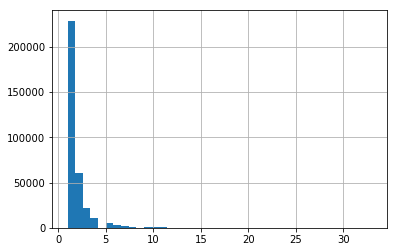

In [14]:
df["user_review_count"].hist(bins=40)

In [15]:
df.user_review_count.value_counts()

1     228702
2      60926
3      22053
4      10276
5       5660
6       3054
7       2079
8       1232
9        927
10       540
11       440
12       288
13       195
14       140
16       112
15       105
26        78
18        72
21        63
19        57
17        51
23        46
33        33
32        32
28        28
22        22
Name: user_review_count, dtype: int64

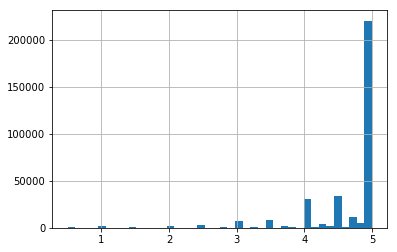

In [16]:
df["user_rating_avg"].hist(bins=40)

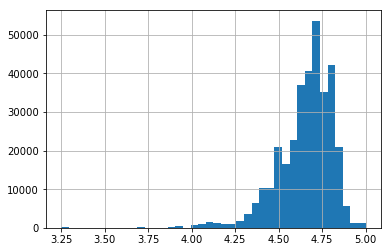

In [17]:
df["course_rating_avg"].hist(bins=40)

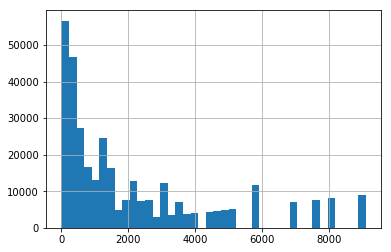

In [18]:
df["course_review_count"].hist(bins = 40)

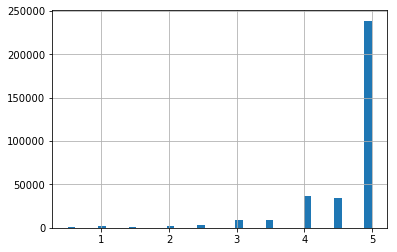

In [19]:
df["rating"].hist(bins=40)

In [20]:
n_users = df.userid.nunique()
n_items = df.course_id.nunique()

In [21]:
print "Total number of users: ", n_users
print "Total number of courses:", n_items

Total number of users:  271459
Total number of courses: 976


In [22]:
sparsity=round(1.0-len(df)/float(n_users*n_items),5)
print('The sparsity level is ' +  str(sparsity*100) + '%')

The sparsity level is 99.873%


In [23]:
courseids = sorted(df["course_id"].unique())
userids = sorted(df["userid"].unique())

In [24]:
cold_users = df[df["user_review_count"] <=2]
cold_users.shape

(289628, 36)

In [25]:
reg = df[df["user_review_count"] > 2]
reg.shape

(47583, 36)

In [60]:
reg["course_id"].nunique()

936

In [61]:
reg["userid"].nunique()

12294

In [26]:
cold_users["userid"].nunique()

259165

In [27]:
cold_users["course_id"].nunique()

975

In [30]:
diff = np.setdiff1d(cold_users["published_title"], reg["published_title"].unique())

In [32]:
diff

array(['22-practical-lessons-in-leadership', 'abhyasa-summary',
       'acumen-presents-angela-duckworth-on-building-grit',
       'angular-2-fundamentals-with-typescript-for-pro-developers-systemjs',
       'beginning-project-management-project-management-level-one',
       'big-data-hadoop-the-complete-course',
       'building-incredible-willpower',
       'clickbank-affiliate-marketing-success-facebook-ads-super-strategy',
       'dan-ariely-on-changing-customer-behavior',
       'enterprise-wpf-with-xaml-from-scratch',
       'excel-2016-intermediate-training-videos',
       'experience-design-patterns', 'find-high-quality-clients-on-upwork',
       'google-ads',
       'how-to-make-a-difference-by-nicholas-kristof-sheryl-wudunn',
       'how-to-write-a-business-plan', 'kali-linux-tutorials',
       'leanmanagement', 'learn-angular-2-from-beginner-to-advanced',
       'learn-software-testing-in-practical-become-a-qa-expert',
       'learnaccountingforfree', 'learnpremierepro', 'ma

In [33]:
diff1 = np.setdiff1d(reg["published_title"].unique(),cold_users["published_title"].unique())

In [34]:
diff1

array(['powerful-goal-setting-step-by-step-blueprint'], dtype=object)

In [37]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
validate_df = pd.DataFrame()
for i in reg["userid"].unique():
    dataIwant = reg[reg["userid"] == i]
    if len(dataIwant) == 3:
        test_index = np.random.choice(dataIwant.index, size = 1, replace=False)
        test = dataIwant.loc[test_index]
        dataIwant.drop(test_index, inplace=True)
        validate_index = np.random.choice(dataIwant.index, size = 1, replace=False)
        validate = dataIwant.loc[validate_index]
        dataIwant.drop(validate_index, inplace=True)
        test_df = pd.concat([test_df, test])
        validate_df = pd.concat([validate_df, validate])
        train_df = pd.concat([train_df, dataIwant])
    else:   
        test_indices = np.random.choice(dataIwant.index, size = len(dataIwant)/4, replace=False)
        test = dataIwant.loc[test_indices]
        dataIwant.drop(test_indices, inplace=True)
        validate_indices = np.random.choice(dataIwant.index, size = len(dataIwant)/4, replace=False)
        validate = dataIwant.loc[validate_indices]
        dataIwant.drop(validate_indices, inplace=True)
        test_df = pd.concat([test_df, test])
        validate_df = pd.concat([validate_df, validate])
        train_df = pd.concat([train_df, dataIwant])

/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning

In [38]:
test_df.shape

(12867, 36)

In [39]:
validate_df.shape

(9960, 36)

In [40]:
train_df.shape

(24756, 36)

In [41]:
train_df.to_csv("train.csv")

In [42]:
validate_df.to_csv("validation.csv")
test_df.to_csv("test.csv")

In [48]:
np.setdiff1d(test_df.course_id.unique(), train_df.course_id.unique())

array([   8814,   17708,   33145,   87156,  150656,  230590,  298212,
        340314,  521580,  527468,  537750,  575592,  614070,  620926,
        649056,  680048,  806474,  822290,  897192,  915782,  927356,
        942320,  950710,  965720,  981502, 1081714, 1109602, 1193034,
       1241254])

In [51]:
df.course_id.nunique()

976

In [52]:
common_users = {}
commonUsers = {}
for i, course1 in enumerate(df.course_id.unique()):
    for j, course2 in enumerate(df.course_id.unique()):
        if i < j:
            course1_users = df[df["course_id"] == course1]["userid"].unique()
            course2_users = df[df["course_id"] == course2]["userid"].unique()
            
            common = np.intersect1d(course1_users, course2_users, assume_unique=True)
            common_users[(course1,course2)] = len(common)
            commonUsers[(course1, course2)] = common
            
            
            
            

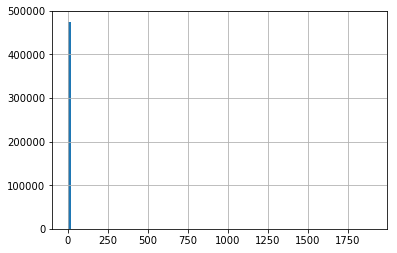

In [53]:
pd.Series(common_users.values()).hist(bins=100)

In [54]:
def pearson_sim(course1_reviews, course2_reviews, n_common):
    
    if n_common==0:
        rho=0.
    else:
        diff1=course1_reviews['rating']-course1_reviews['user_rating_avg']
        diff2=course2_reviews['rating']-course2_reviews['user_rating_avg']
        rho=pearsonr(diff1, diff2)[0]
    return rho

In [65]:
def get_course_reviews(courseid, df, set_of_users):
    
    mask = (df.userid.isin(set_of_users)) & (df.course_id==courseid)
    reviews = df[mask]
    reviews = reviews[reviews.userid.duplicated()==False]
    return reviews

In [66]:
def calculate_similarity(course1,course2,df,similarity_func):     #calculates similarity between 2 restaurants using some similarity function
    
    reviewers_course1=df[df.course_id==course1].userid   #gets all the user ids from df for rest1
    reviewers_course2=df[df.course_id==course2].userid   #gets all the user ids from df for rest2
    
    #computes the intersection (common reviewers) by comparing reviewers for rest1 and rest2
    reviewers_common=set(reviewers_course1).intersection(reviewers_course2) 
    n_common=len(reviewers_common)  #computes the number of common reviewers (length)
    
    #gets the reviews by common reviewers found above for rest1 and rest2
    reviews_course1=get_course_reviews(course1, df, reviewers_common) 
    reviews_course2=get_course_reviews(course2, df, reviewers_common) 
    
    similarity=similarity_func(reviews_course1,reviews_course2,n_common)  #using similarity functino defined above to compute similarity
    
    #checks to see if similarity is NaN and if true, sets similarity to zero
    if np.isnan(similarity): 
        similarity=0
        
    return (similarity,n_common)

In [75]:
df.course_id.unique()

array([ 289230,  851712,  271228,  461160,  437398,  762616,   65830,
        359550,   94430,  364426,  466296,  756150,  538958,  625204,
        764164,  519442,  959700,  533682,  732464,  806922,  922484,
        705264,  995016,  671576,  833442,  362328, 1208618,  714724,
        802794,  647428,  781532,  818990,  895786,   20461,  950390,
        496050,  914296,  567828,  242180,  866196,  618736,  383576,
        382002,  719002, 1039062,  390866,  356030,  419658, 1110626,
        687466,  892102,  405282,  861624, 1000574,  520116,  393306,
        111712,  258316, 1042110, 1070124, 1035000,  551498,  448574,
        886300,  486628,  394676,   18237,  345340,   81094,  670034,
        238934,  221674,  300316,   11174,  877482,  548278,  427530,
        822444,  370636, 1132057,  758582,  203732,  802578,  120820,
        477958, 1075642,  746014,  745468,  480494,  903744, 1034400,
        947098,  513244,  328292,  685550, 1052118,  787236,  945978,
        394434,  438

In [67]:
similarities_dic = {}
for i in common_users.keys():
    course1 = i[0]
    course2 = i[1]
    similarity, n_common = calculate_similarity(course1, course2, df, pearson_sim)
    similarities_dic[i] = (similarity, n_common)

/home/anusha/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/anusha/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:3031: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


In [76]:
similarities_dic[(289230, 851712)]

(-0.56373539070999334, 22)

In [77]:
np.save('similarities_corr.npy', similarities_dic)

In [78]:
np.save("common_users.npy", common_users)

In [79]:
np.save("commonUses.npy", commonUsers)

In [238]:
def pred_one_user(user_id, report_run_time=False):
    start_time = time()
    items_rated_by_this_user = ratings_mat_train[user_id].nonzero()[1]
    out = np.zeros(n_items_test)
    for item_to_rate in range(n_items_test):
        relevant_items = np.intersect1d(neighborhoods[item_to_rate],items_rated_by_this_user, assume_unique=True)
        out[item_to_rate] = ratings_mat_train[user_id, relevant_items] * \
        item_sim_mat[item_to_rate, relevant_items] / \
        item_sim_mat[item_to_rate, relevant_items].sum()
        if report_run_time:
            print("Execution time: %f seconds" % (time()-start_time))
        cleaned_out = np.nan_to_num(out)
    return np.where(cleaned_out > 0)[0], cleaned_out[cleaned_out > 0]

In [239]:
item_item_pred = {}
for i in test_df["new_user_id"].unique():
    print i
    item_item_pred[i] = pred_one_user(i-1)
    


6614


/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


12278
8642
8671
5119
10529
10490
9034
8151
8508
10728
11430
11903
12061
179
11915
11892
11847
11872
1285
12036
11664
11781
1420
11021
1092
8984
10325
7730
10934
3388
2139
10884
11938
12153
4108
8957
5584
2641
12042
8644
11842
6140
10499
5989
7794
10900
11616
11991
695
8377
343
11763
6631
93
8072
8897
3266
11878
7033
3067
1095
2628
11356
7829
11484
11475
541
7178
124
3008
2846
11698
5944
7049
8900
5305
11507
11313
10384
11409
8016
3275
11244
10790
6781
10563
6141
8941
9849
10733
11765
3502
4724
2135
340
11161
10742
10760
8502
9339
11708
1025
7503
10039
11312
5573
11190
2354
1023
9546
11414
11630
11628
10253
10916
139
11264
716
10393
10809
11474
8191
11119
5497
10839
11403
2542
9474
4112
11222
2146
5269
10866
9005
7961
1961
4796
9772
11189
6226
11345
6787
7091
4255
2541
11109
5038
9450
10953
9375
1653
11053
5303
5160
10980
10320
9404
10981
666
8910
11154
60
11085
9066
9157
7781
6975
7427
2511
7812
10435
403
101
10854
1650
3503
3238
461
3529
10634
4565
10446
181
6321
8434
9561
4966
6068
1

1129
1462
6589
3471
7098
6995
3350
4554
3637
7298
2805
5214
920
3168
7805
5089
7199
7213
6805
6260
4762
7592
6595
7011
2120
1944
3982
810
1196
6688
4219
2396
6792
4617
5340
935
230
6769
688
5738
1258
1093
1715
1594
6065
5896
5857
2927
3916
5772
5829
2602
5652
2877
5519
483
1234
5427
5009
251
4512
4800
4289
3468
2234
11308
8139
330
3666
4428
254
529
9685
10194
7669
6419
8347
3839
1407
557
7884
1536
422
6778
8882
10032
713
3799
5574
12246
10650
11013
7478
8466
9751
10045
10110
10362
9544
2475
3001
9363
10138
10893
3422
6171
6749
9090
11797
2694
9638
9373
9756
9841
10843
5798
9498
8627
5940
6041
734
8563
7659
6793
5773
3822
10102
10436
10363
4432
7785
4922
8679
6323
4430
2039
2996
233
6152
5099
5732
8767
10990
7913
1926
3179
12221
11099
8806
9128
1303
10169
7733
4572
10646
8318
9632
12286
11967
6231
10042
10908
12220
11703
8140
11178
12149
10485
12259
1387
10741
10519
11832
7745
11748
11810
11549
11625
10821
1661
3250
11388
12112
7936
11639
599
11969
12020
10372
10214
12166
3857
10304
104

1949
7830
6285
10681
3827
6667
10648
10380
243
8344
7240
4759
10402
827
9750
8637
6525
4014
8736
7627
7618
9777
2597
7552
10336
9873
8019
3567
9167
13
4956
10238
9271
7328
7369
10123
2640
7542
9984
9813
3688
7019
9728
2232
4261
9862
10285
8211
3979
9967
4979
908
9358
8432
8750
141
10091
10113
9940
2814
10079
4260
8668
9676
120
10112
3989
9875
9927
9542
8286
2432
10022
9725
8350
7414
3921
9917
9744
3655
2498
1667
8837
9086
4635
2496
9117
3109
4331
9050
2995
3249
3376
9840
9655
4155
8974
3538
6954
7464
7324
9177
6130
4328
2048
9779
140
8820
6001
6156
3906
9518
7425
6790
2516
5280
2463
9521
3820
8165
4836
9573
5098
2
2457
4100
7155
6166
6135
2407
8759
2654
8841
2116
5689
2418
3756
9057
5307
9185
9335
7296
5529
7926
4342
3085
4938
3322
3651
1362
7018
3718
6703
9166
7905
8395
234
9003
7211
5590
3549
6100
1326
8774
6359
7179
4185
4228
5093
4874
7510
2871
7189
6906
2467
2856
7512
6551
8665
8288
8095
1316
7526
2052
5270
7989
8457
7774
6969
6343
7711
7404
7024
1919
4659
6891
4468
1771
2579
4358

5959
7699
4664
2847
9871
10303
8527
9126
1295
6665
5595
3596
7531
6293
8464
8032
3771
3959
2290
8387
2605
9993
5868
9101
2554
6295
12206
11290
1166
9439
8667
8321
9161
10828
9884
5823
11706
3668
3999
3356
11196
1422
5272
2582
9939
5140
10947
8186
10397
5057
11669
11876
7600
10599
11263
11203
3629
10469
10458
2168
4170
7180
8573
2652
711
11629
11680
1424
182
1858
10756
7437
1811
12137
9526
10551
5267
797
6999
11657
10233
11522
11674
6621
5780
7736
10796
11093
784
4598
10333
11391
11145
9791
12033
4390
2636
11108
8684
12146
1641
1806
4571
1395
2454
211
3420
10825
10452
11868
8126
11850
11860
9781
1535
3687
11659
8202
1855
5373
11219
10248
574
11736
9612
10842
10883
1671
2766
1752
10298
3433
4678
3038
9947
11626
11508
3391
8884
11020
1075
6948
11500
4168
9272
8133
11451
1940
2671
2221
11052
8783
3534
7613
11240
3591
3156
11271
7866
515
9093
1698
10765
10890
6992
8168
11080
1830
6482
5949
9989
5788
10423
4782
8252
9211
3432
4269
8803
7252
8287
10602
8808
3806
10696
5102
5422
8860
7568
6153

12055
9920
10396
3289
7544
6866
11895
4050
8744
11478
11977
9141
11851
11757
10466
11576
10178
4454
10940
11275
9736
10216
10328
6956
11012
9959
6970
10187
10868
8951
10322
949
5716
10147
8526
8077
8145
5478
10146
8233
6452
9281
8263
8999
2453
549
6493
358
5025
6917
7898
7271
7048
5052
6256
7080
4338
6408
4040
2348
4698
2289
1188
9398
12133
10457
5745
8461
8763
2224
10274
11473
10671
5623
3428
9073
2337
9301
6272
6496
4054
3504
3849
4863
3779
3496
5580
11464
906
6158
12189
486
670
3639
4069
2530
12116
11954
11566
10862
11136
4389
10573
8591
1555
11919
11623
1480
22
6708
11775
6030
11863
8693
8797
6588
11502
11350
8647
1646
1975
8170
9308
4456
11683
2478
3330
1922
6081
983
2848
9324
2385
8404
11351
635
1693
11274
7000
7028
2798
10848
6723
10570
10919
3005
1319
7838
10679
663
1950
10767
6002
7771
1161
10820
2379
2142
1325
8550
6213
10631
7756
10675
7847
6503
2480
10574
10522
10341
812
8365
10017
512
3566
8219
7071
6505
9674
2915
188
9887
6947
7459
14
4747
1353
4422
5770
9583
6187
2711
94

2609
459
3390
1219
2372
6108
9983
8559
8369
6608
641
7295
9314
9076
1500
6036
9164
7453
9045
3786
3105
2999
8694
8681
2154
6266
5664
653
733
3731
5320
5075
1687
1310
6640
5874
6292
6413
2277
5159
4580
4730
8386
9615
841
6776
3104
10865
6170
1226
10318
6990
3703
5155
4321
1383
9245
8316
7551
5907
11671
5534
7712
5938
5867
2473
3323
11971
1816
1822
8027
9603
4847
6254
6124
8809
105
8034
1633
1240
9497
1976
2414
4535
9952
7257
415
1707
10595
877
8731
4355
1622
6592
1381
6424
11560
1572
7313
12255
6186
7546
6639
2950
6307
7147
7422
4072
2359
11087
10653
1985
11329
7391
755
773
7030
10114
5734
11018
3616
1684
9022
1703
1743
3235
1861
568
9191
9859
8517
7534
5871
4795
528
2067
8102
3110
7089
6977
2283
5105
6462
6915
3026
192
7206
2486
2645
5933
7883
3439
1444
6545
4819
4465
1722
355
1664
1125
6316
5967
3411
5438
1823
5591
1652
3019
2953
2578
2649
1972
3219
1066
4920
8373
11166
8420
7054
3261
11010
3329
1967
2780
112
11909
8813
6180
6014
758
12092
10782
999
8857
10713
3070
2037
5495
11569
200

1271
5405
3386
1911
6035
4986
5128
4085
1906
3621
3605
425
1800
2634
1534
565
1101
1253
235
7748
10794
8829
4691
1081
9466
5859
8060
5381
3717
5899
3823
631
7009
7892
11188
11679
4352
2984
9382
11186
6193
11769
8672
8780
11131
9074
2383
10807
11389
7665
10451
1692
3815
3732
5515
9631
10888
11877
4025
1748
8004
10269
9097
9726
8289
7984
9970
2110
7690
10549
10896
1323
11123
553
9830
7970
9196
6963
561
10352
3306
9462
7304
6074
7710
2088
3437
9870
3441
7634
407
7563
2497
7772
4751
7486
4303
1798
969
3106
9072
3455
2755
4207
1759
3024
2040
5426
5729
6183
10857
10012
3152
3483
8029
10962
5363
3696
9720
4158
5434
7476
1744
8282
2889
331
2152
11834
9651
6165
10424
4425
5960
11462
11731
3230
6839
6705
12201
5208
4030
7887
10276
11503
10904
10592
9826
10122
9279
292
9278
10101
1694
115
1793
11405
5182
7237
6095
7333
2532
6013
5633
3853
8389
1274
9002
9506
6495
7611
10035
11839
11550
5743
5670
8709
4002
7355
319
634
418
8109
2957
559
1320
7477
3126
3493
2452
1772
213
4825
10347
10142
6195
2913


7374
1916
6422
6105
5536
1048
4679
4808
3794
447
777
4021
1198
967
6584
11603
8791
4582
8949
8231
11195
2528
2716
1374
3590
4045
2176
1597
2905
644
3072
8584
889
898
4032
2637
3558
2050
1305
1264
5445
4629
3704
1108
2722
347
2302
9350
6808
9061
7112
6869
4505
3792
3951
6670
7588
10217
9560
1522
8660
3570
2193
5638
4039
1013
4805
1847
2300
5191
1875
7980
6535
4654
9150
10943
9165
11419
8572
4603
575
11416
4559
8840
1058
1606
636
148
5995
448
2072
9237
1071
5483
3142
2197
128
2126
2989
7559
6985
431
945
157
9444
261
1415
4113
6807
627
162
9553
9198
2481
6101
3365
1928
76
796
4370
3202
4268
30
4436
7861
3308
6329
4662
5985
4339
6451
394
4186
2688
5039
2881
2574
4542
3800
2178
3083
11788
11921
11994
10956
6689
5614
5240
8802
7582
5665
2857
4440
2280
2980
2057
5237
10453
10136
31
6120
1443
1272
1361
2238
9219
3832
10886
1148
3240
8080
354
8497
302
283
9973
11705
8804
7366
7793
5174
2115
3875
9
7458
3382
1882
8239
3392
8419
1888
9924
9932
2109
801
10108
1458
9504
9285
3254
5687
8265
5926
161

In [240]:
len(item_item_pred.keys())

12294

In [241]:
test_df["userid"].nunique()

12294

In [249]:
predictions = []
for i in xrange(len(test_df)):
    userid = test_df.iloc[i]["new_user_id"]
    item_not_rated = test_df.iloc[i]["new_course_id"]
    rel_items = item_item_pred[userid][0]
    if item_not_rated in rel_items:
        idx = np.where(item_item_pred[userid][0] == item_not_rated)
        predictions.append(item_item_pred[userid][1][idx])
    else:
        predictions.append(0)
    

In [250]:
predictions

[array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 2.5]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 5.]),
 array([ 4.5]),
 0,
 0,
 array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 array([ 5.]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [251]:
get_rmse(test_df["rating"], predictions)

4.6526561336540482

In [252]:
item_item_pred

{1: (array([ 12, 130, 135, 191, 193, 203, 270, 303, 331, 364, 431, 433, 473,
         492, 506, 575, 622, 631, 689, 732, 812, 850, 858, 882]),
  array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.])),
 2: (array([  4,  18,  42,  56,  63,  87,  95,  99, 105, 126, 163, 164, 180,
         189, 201, 207, 218, 222, 236, 253, 259, 286, 297, 301, 309, 319,
         321, 329, 340, 351, 359, 367, 371, 373, 381, 387, 395, 401, 403,
         414, 421, 479, 488, 533, 534, 548, 551, 577, 587, 591, 616, 618,
         619, 629, 630, 636, 670, 686, 690, 700, 716, 723, 729, 739, 746,
         749, 750, 753, 776, 783, 787, 789, 793, 795, 806, 807, 813, 825,
         851, 853, 856, 862, 873, 883, 888, 908, 934]),
  array([ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  

In [256]:
reg[reg["new_user_id"] == 1]

,Unnamed: 0,_class_x,content,course_id,created,id,modified,rating,title_x,user,...,url,visible_instructors,user_rating_avg,user_review_count,course_review_count,course_rating_avg,instructor_name,instructor_title,new_course_id,new_user_id
182696,222300,course_review,Very good start.,496924,2017-01-08 13:52:54,4832980,2017-01-08T13:53:01Z,5.0,NaN,"{u'_class': u'user', u'display_name': u'Gokhan...",...,/growth-hacking-masterclass-become-a-digital-m...,[{u'image_100x100': u'https://udemy-images.ude...,5.0,3,264,4.471591,u'Davis',u'CMO of Eazl,374,1
195830,67847,course_review,It is exactly What I expected. A few lecture i...,671544,2016-12-30 10:32:33,4679314,2016-12-30T10:32:54Z,5.0,NaN,"{u'_class': u'user', u'display_name': u'Gokhan...",...,/the-ultimate-google-adwords-training-course/,[{u'image_100x100': u'https://udemy-images.ude...,5.0,3,3383,4.839196,u'Isaac Rudansky',u'Certified Google AdWords Pro |Co-founder of...,537,1
272778,127817,course_review,Begining is good. It is going better than I ex...,484606,2017-01-03 08:52:02,4732832,2017-01-05T13:06:22Z,5.0,NaN,"{u'_class': u'user', u'display_name': u'Gokhan...",...,/instagram-marketing-for-small-businesses/,[{u'image_100x100': u'https://udemy-images.ude...,5.0,3,560,4.598214,u'BenJamin Wilson',u'Marketing Manager - Blue Industries'}],365,1


In [263]:
item_sim_mat[373, 536]

0.0

In [283]:
predictions_test_random = np.nan_to_num(predictions_test_random)

In [284]:
get_rmse(test_data["rating"], predictions_test_random)

1.9077913808131732

In [288]:
sf = graphlab.SFrame(reg[["userid", "course_id", "rating"]])

In [289]:
rec = graphlab.recommender.factorization_recommender.create(sf, user_id='userid', item_id='course_id',target='rating',solver='als',side_data_factorization=False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 47583 observations with 12294 users and 936 items.

Data prepared in: 0.309814s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 85us         | NA                     |

+---------+--------------+------------------------+

| 0       | 68.551ms     | 0.273508               |

| 1       | 115.494ms    | 0.0431926              |

| 2       | 158.158ms    | 0.0363155              |

| 3       | 198.084ms    | 0.0324032              |

| 4       | 251.389ms    | 0.0296459              |

| 5       | 286.669ms    | 0.0275681              |

| 6       | 322.277ms    | 0.0259474              |

| 7       | 369.449ms    | 0.0246198              |

| 8       | 420.367ms    | 0.0234794              |

| 9       | 454.58ms     | 0.0224738              |

| 10      | 496.297ms    | 0.0215805              |

| 11      | 538.751ms    | 0.0207824              |

| 12      | 588.079ms    | 0.0200644              |

| 13      | 616.816ms    | 0.0194141              |

| 14      | 679.3ms      | 0.0188219              |

| 15      | 727.059ms    | 0.0182802              |

| 16      | 768.333ms    | 0.0177823              |

| 17      | 795.156ms    | 0.0173217              |

| 18      | 842.72ms     | 0.0168929              |

| 19      | 897.802ms    | 0.016491               |

| 20      | 942.229ms    | 0.016112               |

| 21      | 968.757ms    | 0.0157526              |

| 22      | 1.02s        | 0.0154102              |

| 23      | 1.06s        | 0.015083               |

| 24      | 1.09s        | 0.0147704              |

| 25      | 1.14s        | 0.0144716              |

| 26      | 1.19s        | 0.0141859              |

| 27      | 1.24s        | 0.0139123              |

| 28      | 1.28s        | 0.0136504              |

| 29      | 1.32s        | 0.0133997              |

| 30      | 1.36s        | 0.0131597              |

| 31      | 1.40s        | 0.0129299              |

| 32      | 1.46s        | 0.0127095              |

| 33      | 1.50s        | 0.0124977              |

| 34      | 1.55s        | 0.0122938              |

| 35      | 1.61s        | 0.0120971              |

| 36      | 1.65s        | 0.0119072              |

| 37      | 1.70s        | 0.0117235              |

| 38      | 1.73s        | 0.0115458              |

| 39      | 1.76s        | 0.0113738              |

| 40      | 1.81s        | 0.0112071              |

| 41      | 1.86s        | 0.0110457              |

| 42      | 1.91s        | 0.0108891              |

| 43      | 1.95s        | 0.0107374              |

| 44      | 2.00s        | 0.0105902              |

| 45      | 2.04s        | 0.0104472              |

| 46      | 2.09s        | 0.0103087              |

| 47      | 2.12s        | 0.0101746              |

| 48      | 2.16s        | 0.0100447              |

| 49      | 2.19s        | 0.0099188              |

| FINAL   | 2.19s        | 0.0099188              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [291]:
one_datapoint_sf = graphlab.SFrame({'userid': [33415408], 'course_id': [289230]})
print "rating:", rec.predict(one_datapoint_sf)[0]

rating: 4.76554651871


In [292]:
rec['coefficients']

{'course_id': Columns:
 	course_id	int
 	linear_terms	float
 	factors	array
 
 Rows: 936
 
 Data:
 +-----------+--------------+-------------------------------+
 | course_id | linear_terms |            factors            |
 +-----------+--------------+-------------------------------+
 |   289230  |     0.0      | [-0.102848447859, 0.040665... |
 |   851712  |     0.0      | [0.028173474595, -0.122486... |
 |   271228  |     0.0      | [0.0777796953917, -0.11187... |
 |   461160  |     0.0      | [0.0122027751058, 0.056604... |
 |   437398  |     0.0      | [-0.0841154009104, -0.1527... |
 |   762616  |     0.0      | [0.0129306130111, 0.193999... |
 |   65830   |     0.0      | [-0.0882218629122, -0.3994... |
 |   359550  |     0.0      | [-0.0438423603773, -0.1227... |
 |   94430   |     0.0      | [-0.290992796421, -0.16468... |
 |   364426  |     0.0      | [0.0386252328753, -0.02609... |
 +-----------+--------------+-------------------------------+
 [936 rows x 3 columns]
 Note: Onl

In [294]:
course_sf = rec["coefficients"]["course_id"]

In [295]:
len(course_sf)

936

In [299]:
len(course_sf["factors"][0])

8

In [300]:
user_sf = rec['coefficients']['userid']
print len(user_sf)          
print len(user_sf['factors'][0]) 

12294
8


In [302]:
np.average(sf["rating"])

4.7655465187146673

In [303]:
predictions = rec.predict(sf)
rmse = np.sqrt(mean_squared_error(sf['rating'], predictions))

In [304]:
rmse

0.009918795990439544

In [307]:
train_sf = graphlab.SFrame(train_df[["userid", "course_id", "rating"]])

In [315]:
def pearson_sim(course1_reviews, course2_reviews, common):

    if common==0:
        rho=0.
    else:
        diff1=course1_reviews['rating']-course1_reviews['user_rating_avg']
        diff2=course2_reviews['rating']-course2_reviews['user_rating_avg']
        rho=pearsonr(diff1, diff2)[0]
        if np.isnan(rho):
            rho=0.
    return rho

In [316]:
def get_course_reviews(courseid, df, set_of_users):
    """
    given a resturant id and a set of reviewers, return the sub-dataframe of their
    reviews.
    """
    mask = (df.user_id.isin(set_of_users)) & (df.course_id==courseid)
    reviews = df[mask]
    reviews = reviews[reviews.userid.duplicated()==False]
    return reviews
